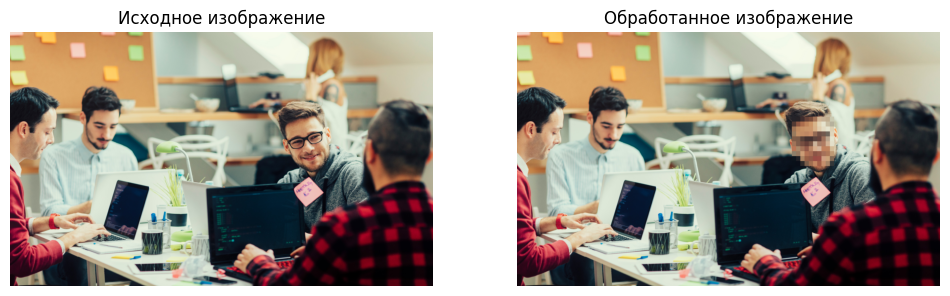

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def average_colors_in_regions(image_path, y_min, y_max, x_min, x_max, h):
    image = cv2.imread(image_path)
    image_copy = image.copy()

    region_height = (y_max - y_min) // h
    region_width = (x_max - x_min) // h

    average_colors = np.zeros((h, h, 3), dtype=np.uint8)

    for i in range(h):
        for j in range(h):
            y_start, y_end = i * region_height + y_min, (i + 1) * region_height + y_min
            x_start, x_end = j * region_width + x_min, (j + 1) * region_width + x_min

            region = image[y_start:y_end, x_start:x_end]
            average_color = np.mean(region, axis=(0, 1)).astype(np.uint8)

            image_copy[y_start:y_end, x_start:x_end] = average_color

    return image_copy

def display_image_with_average_colors(average_colors):
    plt.imshow(average_colors)
    plt.axis('off')
    plt.show()

image_path = 'source_image.jpg'
y_min, y_max = 600, 950
x_min, x_max = 1950, 2250
h = 10

result_image = average_colors_in_regions(image_path, y_min, y_max, x_min, x_max, h)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
axes[0].set_title('Исходное изображение')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Обработанное изображение')
axes[1].axis('off')

plt.show()
output_path = 'result_image.jpg'
cv2.imwrite(output_path, result_image)